**REGRESION LOGISTICA**

Predecir qué tipo de tecnología de Internet 4G es más probable que tenga una Provincia, Partido o localidad (variable objetivo 4G_2022).

In [1]:
# Importando las bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [2]:
# Cargando los datos
df = pd.read_csv('dataframe_completo.csv')

In [3]:
# Definiendo las variables predictoras y la variable objetivo
X = df.drop('4G_2022', axis=1)
y = df['4G_2022']

In [4]:
# Codificación one-hot de las variables categóricas
X = pd.get_dummies(X, columns=['Provincia', 'Partido', 'Localidad'])

In [5]:
# Dividiendo los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Creando el modelo de regresión logística
model = LogisticRegression()

In [7]:
# Entrenando el modelo
model.fit(X_train, y_train)

LogisticRegression()

In [8]:
# Haciendo predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [9]:
# Imprimiendo el informe de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.21      0.33      6444
           1       0.74      0.97      0.84     14969

    accuracy                           0.74     21413
   macro avg       0.75      0.59      0.59     21413
weighted avg       0.75      0.74      0.69     21413



El informe de clasificación es una forma común de evaluar el rendimiento de un modelo de clasificación. Cada término significa :

- **Precision**: Es la proporción de verdaderos positivos (las instancias que el modelo clasificó correctamente como positivas) entre todas las instancias que el modelo clasificó como positivas. En tu caso, la precisión para la clase 0 es 0.76 y para la clase 1 es 0.74.

- **Recall** (también conocido como sensibilidad): Es la proporción de verdaderos positivos entre todas las instancias que son realmente positivas. En tu caso, el recall para la clase 0 es 0.21 y para la clase 1 es 0.97.

- **F1-score**: Es una medida que combina la precisión y el recall en un solo número utilizando la media armónica. Un F1-score perfecto sería 1, mientras que el peor valor posible sería 0. En tu caso, el F1-score para la clase 0 es 0.33 y para la clase 1 es 0.84.

- **Support**: Es el número de instancias reales para cada clase en el conjunto de datos de prueba. En tu caso, hay 6444 instancias de la clase 0 y 14969 instancias de la clase 1.

- **Accuracy**: Es la proporción de predicciones correctas entre todas las predicciones realizadas. En tu caso, la precisión del modelo es 0.74.

- **Macro avg**: Es el promedio no ponderado de las métricas para cada clase.

- **Weighted avg**: Es el promedio ponderado de las métricas para cada clase, donde cada métrica se pondera por el número de instancias en esa clase.

Al predecir la variable 4G_2022 con regresión logística, hay varios puntos que podríamos comentar basándonos en el informe de clasificación que se proporcionó:

**Precisión general del modelo**: La precisión general del modelo es del 74%, lo que significa que el modelo predijo correctamente el 74% de las instancias en tu conjunto de datos de prueba.

**Rendimiento en las clases individuales**: El modelo parece tener un rendimiento mucho mejor al predecir la clase 1 (donde 4G_2022 es 1) que al predecir la clase 0 (donde 4G_2022 es 0). Esto se evidencia en las métricas de precisión, recall y F1-score para cada clase. Para la clase 1, estas métricas son relativamente altas (0.74, 0.97 y 0.84 respectivamente), mientras que para la clase 0 son bastante bajas (0.76, 0.21 y 0.33 respectivamente).

**Desequilibrio de clases**: El informe de clasificación muestra que hay muchas más instancias de la clase 1 (14969) que de la clase 0 (6444) en tu conjunto de datos de prueba. Este desequilibrio de clases podría estar afectando al rendimiento del modelo, ya que los modelos de machine learning a menudo tienen dificultades para manejar clases desequilibradas.

**Posibles mejoras**: Podrías intentar varias estrategias para mejorar el rendimiento del modelo. Por ejemplo, podrías intentar equilibrar las clases utilizando técnicas como el sobremuestreo o el submuestreo. También podrías intentar ajustar los hiperparámetros del modelo (como la tasa de aprendizaje o la regularización) para ver si eso mejora el rendimiento.

***Determinar qué localidad es más probable que tenga la tecnología de Internet 4G***

In [10]:
# Asumiendo que 'model' es tu modelo entrenado y 'X' son tus datos
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})

# Ordenar los coeficientes en orden descendente
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

print(coefficients)

                   Feature   Coefficient
2           Poblacion_2022  4.367448e-04
21              Total_2022  1.191443e-04
14    Cant_Cablemodem_2022  5.669468e-05
16   Cant_FibraOptica_2022  3.607509e-05
13          Cant_ADSL_2022  1.756367e-05
..                     ...           ...
43      Provincia_SAN LUIS -1.102600e-09
26  Provincia_BUENOS AIRES -1.297732e-09
24                 Latitud -1.847371e-07
23        Salario_promedio -1.881137e-07
25                Longitud -3.950918e-07

[3235 rows x 2 columns]


Para determinar qué Provincia o localidad es más probable que tenga la tecnología de Internet 4G, necesitaríamos analizar los coeficientes del modelo de regresión logística que has entrenado. Los coeficientes indican la relación entre cada característica y la probabilidad logarítmica de la clase positiva (en este caso, tener 4G en 2022).
Este código crea un DataFrame que contiene cada característica y su coeficiente correspondiente, y luego lo ordenará para que las características con los coeficientes más altos estén en la parte superior. Puedes buscar las características correspondientes a las localidades en este DataFrame para ver cuáles tienen los coeficientes más altos.

In [11]:
# Filtrando el DataFrame para mostrar solo las filas que empiezan con 'Provincia', 'Partido' y 'Localidad'
filtered_coefficients = coefficients[coefficients['Feature'].str.startswith(('Provincia', 'Partido', 'Localidad'))]

print(filtered_coefficients)

                   Feature   Coefficient
45      Provincia_SANTA FE  2.759277e-09
30       Provincia_CORDOBA  1.774189e-09
32    Provincia_ENTRE RIOS  1.428477e-09
28         Provincia_CHACO  1.018156e-09
31    Provincia_CORRIENTES  1.002665e-09
..                     ...           ...
29        Provincia_CHUBUT -4.933300e-10
34         Provincia_JUJUY -6.159086e-10
40     Provincia_RIO NEGRO -6.763346e-10
43      Provincia_SAN LUIS -1.102600e-09
26  Provincia_BUENOS AIRES -1.297732e-09

[3209 rows x 2 columns]


In [12]:


# Exportando el DataFrame 'filtered_coefficients' a un archivo CSV
filtered_coefficients.to_csv('filtered_coefficients.csv', index=False)



**Realizamdos una Matriz de Confusión para describir el rendimiento del modelo de clasificación.**

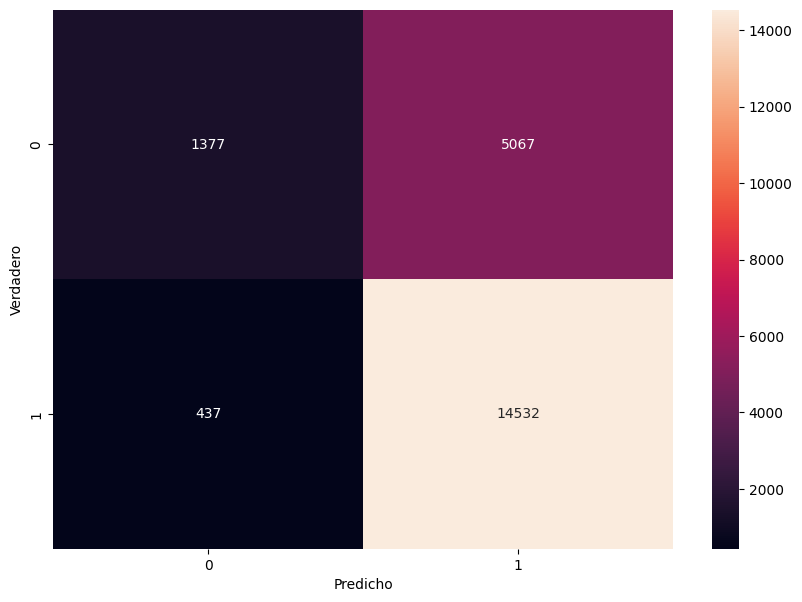

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generando la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizando la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.show()

Calculamos las métricas para evaluar la matriz de confusión

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculando la precisión
precision = precision_score(y_test, y_pred)

# Calculando el recall
recall = recall_score(y_test, y_pred)

# Calculando el puntaje F1
f1 = f1_score(y_test, y_pred)

# Calculando la exactitud
accuracy = accuracy_score(y_test, y_pred)

print(f'Precisión: {precision}')
print(f'Recall: {recall}')
print(f'Puntaje F1: {f1}')
print(f'Exactitud: {accuracy}')

Precisión: 0.7414664013470075
Recall: 0.9708063330883827
Puntaje F1: 0.8407775977782921
Exactitud: 0.7429598841825059
